In [1]:
import tensorflow_hub as hub
import os
import numpy as np
import glob
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [2]:
base_dir = '/Users/anasarodake/DataSpell/UnI-ML-DL/video_Ki/images'
classes = ['smile' , 'neutral']

In [3]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [4]:
IMG_SHAPE = 250

batch_size =10

image_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.5,
    horizontal_flip=True,
    width_shift_range=0.15,
    height_shift_range=0.15
)

train_data_gen = image_gen.flow_from_directory(
    directory=train_dir,
    shuffle=True,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= batch_size,
    class_mode='sparse',
    classes=classes
)

Found 650 images belonging to 2 classes.


In [5]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [6]:
#dieser ablock sucht nach Bildern, die evtl. einen Fehler bei ber Implimentierung verursachen und zeigt sie auf
import PIL
from pathlib import Path
path = Path(train_dir).rglob("*.jpeg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
        print(img_p)

In [7]:
image_gen = ImageDataGenerator(
    rescale=1./255
)


val_data_gen =  image_gen.flow_from_directory(
    directory=val_dir,
    classes=classes,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= batch_size,
    class_mode= 'sparse')

Found 110 images belonging to 2 classes.


In [8]:
image_gen = ImageDataGenerator(
    rescale=1./255
)


test_data_gen =  image_gen.flow_from_directory(
    directory=test_dir,
    classes=classes,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= batch_size,
    class_mode= 'sparse')




Found 325 images belonging to 2 classes.


In [9]:
model = Sequential()

model.add(Conv2D(4,3 , padding='same' , input_shape=(IMG_SHAPE, IMG_SHAPE, 3) , activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(16, 3 ,padding='same' , activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3 ,padding='same' , activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))




model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dropout(0.4))

model.add(Dense(1024 ,  activation='relu'))

model.add(Dropout(0.4))
model.add(Dense(2, activation='softmax'))

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [11]:
#from tensorflow.python.keras.callbacks import EarlyStopping
#callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss' , patience= 3 , verbose=1)

epochs = 50
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))), #alle Bilder / 10
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size))),
    #callbacks=[callback]
)

2022-04-18 15:49:45.613447: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
/Users/anasarodake/miniforge3/envs/deep/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Epoch 1/50
65/65 [==============================] - 10s 150ms/step - loss: 0.7489 - accuracy: 0.5046 - val_loss: 0.6893 - val_accuracy: 0.5364
Epoch 2/50
65/65 [==============================] - 9s 140ms/step - loss: 0.6937 - accuracy: 0.5292 - val_loss: 0.6905 - val_accuracy: 0.5364
Epoch 3/50
65/65 [==============================] - 9s 137ms/step - loss: 0.6926 - accuracy: 0.5369 - val_loss: 0.6906 - val_accuracy: 0.5364
Epoch 4/50
65/65 [==============================] - 9s 143ms/step - loss: 0.6899 - accuracy: 0.5369 - val_loss: 0.6883 - val_accuracy: 0.5364
Epoch 5/50
65/65 [==============================] - 9s 144ms/step - loss: 0.6889 - accuracy: 0.5662 - val_loss: 0.7202 - val_accuracy: 0.4000
Epoch 6/50
65/65 [==============================] - 10s 148ms/step - loss: 0.6919 - accuracy: 0.5215 - val_loss: 0.6904 - val_accuracy: 0.5364
Epoch 7/50
65/65 [==============================] - 10s 145ms/step - loss: 0.6908 - accuracy: 0.5369 - val_loss: 0.6897 - val_accuracy: 0.5364
Epo

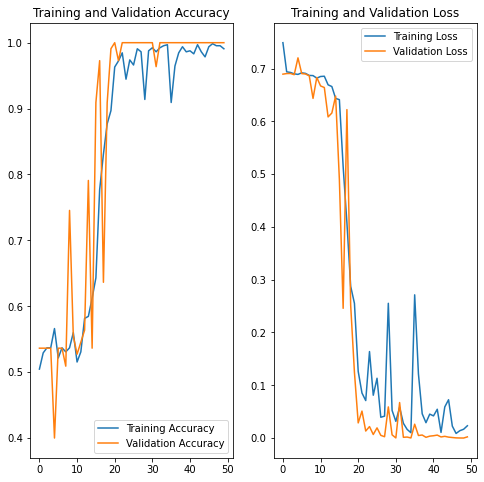

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
evaluated = model.evaluate(
    x = test_data_gen)

33/33 [==============================] - 1s 43ms/step - loss: 0.0039 - accuracy: 1.0000


In [15]:
predict_dir_smile = os.path.join(base_dir, 'test/smile')

image_gen = ImageDataGenerator(
    rescale=1./255
)


predict_smile_data_gen =  image_gen.flow_from_directory(
    directory=predict_dir_smile,

    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= 86,
    class_mode= 'sparse'
)



predicted_smile = model.predict(x = predict_smile_data_gen)



for value in predicted_smile:
    print("\nLächeln Bild, die KI Werte:    lachen:{}      Neutral:{}".format( round(value[0] *100 , 2) ,round(value[1] *100) ) , "   richtig geschätzt:  " ,  (value[0] > value[1]) )

Found 175 images belonging to 1 classes.

Lächeln Bild, die KI Werte:    lachen:100.0      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:100.0      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:100.0      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:100.0      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:100.0      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:100.0      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:100.0      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:100.0      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:100.0      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:100.0      Neutral:0    richtig geschätzt:   True

Lächeln Bild, die KI Werte:    lachen:100.0      Neutral:0    richti

In [16]:
index = 0
false_images = np.array([])
for value in predicted_smile:
    if value[0] < value[1]:
        print("falsch geschätztes BILD:    lachen: {}      Neutral: {}        Bild_Index: {}".format( round(value[0] *100 , 2) ,round(value[1] *100) , index ))
        false_images = np.append(false_images , int(index))
    index = index+1



In [17]:
print("zahl der Falsch geschätzten Bilder: " , len(false_images))

zahl der Falsch geschätzten Bilder:  0


In [18]:
for pic in false_images:
    augmented_images = [predict_smile_data_gen[0][0][int(pic)] for i in range(5)]
    plotImages(augmented_images)

In [19]:
predict_dir = os.path.join(base_dir, 'test/neutral')

image_gen = ImageDataGenerator(
    rescale=1./255
)


predict_neutral_data_gen =  image_gen.flow_from_directory(
    directory=predict_dir,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    batch_size= 43,
    class_mode= 'sparse')



predicted = model.predict(x = predict_neutral_data_gen)
for value in predicted:
    print("Neutrales Bild, die KI Werte:   lachen:{}      Neutral:{}".format( round(value[0] *100 , 2) ,round(value[1] *100) ))

Found 150 images belonging to 1 classes.
Neutrales Bild, die KI Werte:   lachen:0.2      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.21      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.2      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.27      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.2      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.19      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.45      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.35      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.3      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.77      Neutral:99
Neutrales Bild, die KI Werte:   lachen:0.2      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.16      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.53      Neutral:99
Neutrales Bild, die KI Werte:   lachen:0.22      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.29      Neutral:100
Neutrales Bild, die KI Werte:   lachen:0.22      Ne

In [20]:
index = 0
false_images = np.array([])
for value in predicted:
    if value[0] > value[1]:
        print("falsch geschätztes BILD:    lachen: {}      Neutral: {}        Bild_Index: {}".format( round(value[0] *100 , 2) ,round(value[1] *100) , index ))
        false_images = np.append(false_images , int(index))
    index = index+1

In [21]:
print("zahl der Falsch geschätzten Bilder: " , len(false_images))

zahl der Falsch geschätzten Bilder:  0


In [22]:
for pic in false_images:
    augmented_images = [predict_neutral_data_gen[0][0][int(pic)] for i in range(5)]
    plotImages(augmented_images)